Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [5]:
data = pd.read_csv("customer_booking.csv")

data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [46]:
df = data[['num_passengers', 'purchase_lead', 'length_of_stay', 'booking_origin', 'flight_duration', 'booking_complete']]
complete_bookings = df[df['booking_complete'] == 1]
complete_bookings

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [47]:
avg_purchaselead_by_country = complete_bookings.groupby('booking_origin')['purchase_lead'].mean()
avg_purchaselead_by_country

booking_origin
(not set)                62.000000
Australia                59.986667
Bahrain                  16.000000
Bangladesh              122.500000
Belgium                 299.000000
Brunei                   53.951220
Cambodia                 55.250000
Canada                   82.000000
Chile                    87.000000
China                    79.152738
Czech Republic            3.000000
Denmark                 100.000000
France                   66.928571
Germany                  92.500000
Greece                   16.000000
Hong Kong                71.575342
India                    70.847328
Indonesia               106.894309
Iraq                     97.000000
Italy                    71.181818
Japan                    65.554393
Kazakhstan              130.000000
Kenya                    19.000000
Kuwait                   23.500000
Laos                     40.166667
Macau                    59.147368
Malaysia                 86.120340
Mauritius                66.750000
Mexic

In [48]:
lowest_first = avg_purchaselead_by_country.sort_values(ascending=True)
lowest_first

booking_origin
Czech Republic            3.000000
Vanuatu                  11.000000
Sweden                   12.600000
Bahrain                  16.000000
Greece                   16.000000
Kenya                    19.000000
Kuwait                   23.500000
Oman                     24.666667
United Arab Emirates     36.000000
Laos                     40.166667
Taiwan                   49.093750
Russia                   53.666667
Brunei                   53.951220
Spain                    55.000000
Pakistan                 55.000000
Cambodia                 55.250000
Seychelles               56.000000
Romania                  56.000000
Saudi Arabia             58.909091
Mexico                   59.000000
Macau                    59.147368
Vietnam                  59.315789
Australia                59.986667
(not set)                62.000000
Myanmar (Burma)          62.000000
United Kingdom           63.142857
Japan                    65.554393
Mauritius                66.750000
Franc

Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

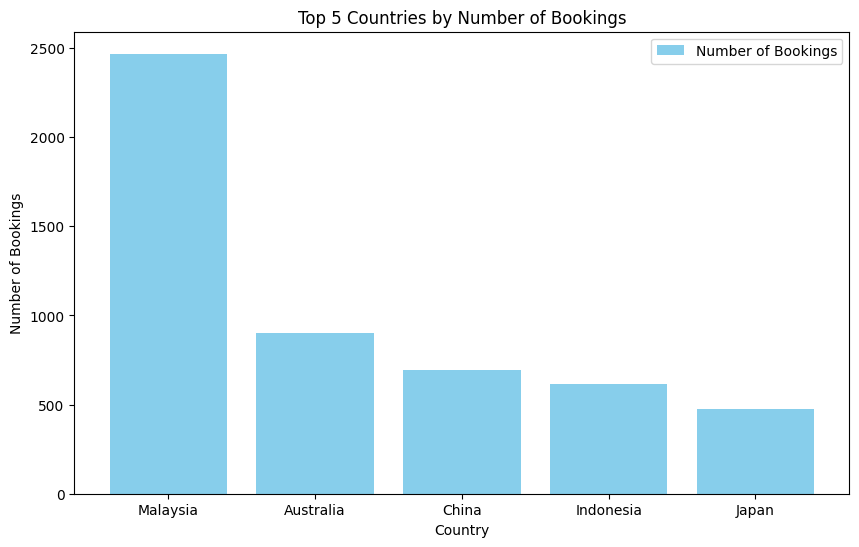

In [51]:
# Count the number of bookings per country
country_bookings = complete_bookings['booking_origin'].value_counts().reset_index() #  Count the number of completed bookings per 
                                                #country using value_counts() on the booking_origin column and reset the index to turn it into a DataFrame
country_bookings.columns = ['Country', 'Bookings']

# Get the top 5 countries with the most bookings
top_countries = country_bookings.head(5)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Bookings'], color='skyblue', label='Number of Bookings')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Top 5 Countries by Number of Bookings')
plt.legend()

# Displaying the plot
plt.show()